#### ***教程创建时间：2021年10月9日15:22:48***

#### ***教程撰写人：@Armor (胡庭恺)***

#### ***教程使用说明：仅供院实验室人员交流讨论使用***


基础内容来源：[掘金-NLP预处理技术](https://juejin.cn/post/6844903997233430536#heading-0)

笔者延续其框架并根据自身学习扩充了对应的内容和实践应用

![avatar](./NLP建模流程.png)

# 1.语料库

1. 维基百科的语料库
2. wordNet、HowNet
3. ...

对于NLP任务来说，没有大量高质量的语料，就是巧妇难为无米之炊，是无法工作的。

而获取语料的途径有很多种，最常见的方式就是直接下载开源的语料库，如：[维基百科的语料库](https://link.juejin.cn/?target=https%3A%2F%2Fdumps.wikimedia.org%2Fzhwiki%2F)。

但这样开源的语料库一般都无法满足业务的个性化需要，所以就需要自己动手开发爬虫去抓取特定的内容，这也是一种获取语料库的途径。

当然，每家互联网公司根据自身的业务，也都会有大量的语料数据，如：用户评论、电子书、商品描述等等，都是很好的语料库。

现在，数据对于互联网公司来说就是石油，其中蕴含着巨大的商业价值。所以，小伙伴们在日常工作中一定要养成收集数据的习惯，遇到好的语料库一定要记得备份（当然是在合理合法的条件下），它将会对你解决问题提供巨大的帮助。

# 2.文本清洗

我们通过不同的途径获取到了想要的语料库之后，接下来就需要对其进行清洗。因为很多的语料数据是无法直接使用的，其中包含了大量的无用符号、特殊的文本结构。

数据类型分为：
- 结构化数据：关系型数据、json等
- 半结构化数据：XML、HTML等
- 非结构化数据：Word、PDF、文本、日志等

需要将原始的语料数据转化成易于处理的格式，一般在处理HTML、XML时，会使用Python的lxml库，功能非常丰富且易于使用。对一些日志或者纯文本的数据，我们可以使用正则表达式进行处理。

In [20]:
import re

chinese_blk = ""
# 定义中文字符的正则表达式
re_han_default = re.compile("([\u4E00-\u9FD5]+)", re.U)
sentence = "我/@爱/自/然/%语/言/处/理*%"
# 根据正则表达式进行切分
blocks = re_han_default.split(sentence)
for blk in blocks:
    # 校验单个字符是否符合正则表达式
    if blk and re_han_default.match(blk):
        chinese_blk += blk
        print(blk)
print(chinese_blk)
# "".join([blk for blk in blocks if blk and re_han_default.match(blk)])

我
爱
自
然
语
言
处
理
我爱自然语言处理


'我爱自然语言处理'

除了上述的内容之外，我们还需要注意中文的编码问题，在**windows平台**下中文的默认编码是**GBK（gb2312）**，而在**linux平台**下中文的默认编码是**UTF-8**。在执行NLP任务之前，我们需要统一不同来源语料的编码，避免各种莫名其妙的问题。

如果大家事前无法判断语料的编码，那么我推荐大家可以使用Python的[chardet](https://link.juejin.cn/?target=https%3A%2F%2Fgithub.com%2Fchardet%2Fchardet)库来检测编码，简单易用。既支持命令行：`chardetect somefile`，也支持代码开发。

In [2]:
# !pip install chardet

In [3]:
import urllib.request
rawdata = urllib.request.urlopen('http://www.baidu.com/').read()

import chardet
chardet.detect(rawdata)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

# 3.分词

中文分词和英文分词有很大的不同，英文是使用空格作为分隔符，所以英文分词基本没有什么难度。而中文是字与字直接连接，中间没有任何的分隔符，但中文是以“词”作为基本的语义单位，很多NLP任务的输入和输出都是“词”，所以中文分词的难度要远大于英文分词。

中文分词是一个比较大的课题，相关的知识点和技术栈非常丰富，可以说搞懂了中文分词就等于搞懂了大半个NLP。中文分词经历了20多年的发展，克服了重重困难，取得了巨大的进步，大体可以划分成两个阶段，如下图所示：
![avatar](./分词技术.png)

目前，主流的中文分词技术采用的都是基于词典最大概率路径+未登录词识别（HMM）的方案，其中典型的代表就是jieba分词，一个热门的多语言中文分词包。

In [25]:
import jieba
sentence = "我爱自然语言处理"
sentence , "/".join(jieba.cut(sentence))
# jieba.cut(sentence)

('我爱自然语言处理', '我/爱/自然语言/处理')

除了 jieba分词外,还有大量的自然语言工具库也可以进行分词

- [NLTK 鼻祖](https://link.zhihu.com/?target=https%3A//github.com/nltk/nltk)
- [Hanlp分词器](https://link.zhihu.com/?target=https%3A//github.com/hankcs/HanLP)
- [哈工大的LTP](https://link.zhihu.com/?target=https%3A//github.com/HIT-SCIR/ltp)
- [THULAC（THU Lexical Analyzer for Chinese）](https://link.zhihu.com/?target=https%3A//github.com/thunlp/THULAC) 由清华大学自然语言处理与社会人文计算实验室研制推出的一套中文词法分析工具包
- [北京大学的pkuseg](https://link.zhihu.com/?target=https%3A//github.com/lancopku/PKUSeg-python)
- [斯坦福分词器](https://link.zhihu.com/?target=https%3A//nlp.stanford.edu/software/segmenter.shtml)
- [SnowNLP](https://link.zhihu.com/?target=https%3A//github.com/isnowfy/snownlp)
- [FudanNLP](https://link.zhihu.com/?target=https%3A//github.com/FudanNLP/fnlp)

对分词感兴趣可以自行搜索相关文章，如：[知乎文章](https://zhuanlan.zhihu.com/p/86322679)

# 4.标准化

标准化是为了给后续的处理提供一些必要的基础数据，包括：去掉**停用词、词汇表、训练数据**等等。

当我们完成了分词之后，可以去掉**停用词**，如：“其中”、“况且”、“什么”等等，但这一步不是必须的，要根据实际业务进行选择，像关键词挖掘就需要去掉停用词，而像训练词向量就不需要。

停用词可以使用实验室和公司出版的停用词表，也可以根据实验数据和场景自建。

In [2]:
# 停用词的读取
def read_stopword(path):
    """
    读取中文停用词表
    """
    with open(path, 'r', encoding='utf-8') as file:
        stopword = file.readlines()
    return [word.replace('\n', '') for word in stopword]

stopword = read_stopword("baidu_stopwords.txt")
# stopword[:10]
stopword

['--',
 '?',
 '“',
 '”',
 '》',
 '－－',
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 "a's",
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'came',
 'can',
 'cannot',
 'cant',
 "can't",
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 "c'mon",
 'co',
 'com',


In [7]:
# 使用停用词过滤
sentences = ["我真的挺喜欢”自然语言处理“的呀?尤其是情感--分类。这是一句实话》"]

for sentence in sentences:
    cut_words = [word for word in jieba.cut(sentence) if word not in stopword]
    print("原句:\t\t{}".format(sentence))
    print("清洗后:\t\t{}".format("".join(cut_words)))
    print("分词结果:\t{}".format("/".join(cut_words)))

原句:		我真的挺喜欢”自然语言处理“的呀?尤其是情感--分类。这是一句实话》
清洗后:		真的挺喜欢自然语言情感分类。这是一句实话
分词结果:	真的/挺/喜欢/自然语言/情感/分类/。/这是/一句/实话


**词汇表**是为语料库建立一个所有不重复词的列表，每个词对应一个索引值，并索引值不可以改变。词汇表的最大作用就是可以将词转化成一个向量，即One-Hot编码。
假设我们有这样一个词汇表：

In [10]:
sentence：我爱自然语言处理 
cutword:
我
爱
自然
语言
处理

那么，我们就可以得到如下的One-Hot编码：

In [11]:
我：  [1, 0, 0, 0, 0]
爱：  [0, 1, 0, 0, 0]
自然：[0, 0, 1, 0, 0]
语言：[0, 0, 0, 1, 0]
处理：[0, 0, 0, 0, 1]

这样我们就可以简单的将词转化成了计算机可以直接处理的数值化数据了。虽然One-Hot编码可以较好的完成部分NLP任务，但它的问题还是不少的。

当词汇表的维度特别大的时候，就会导致经过One-Hot编码后的词向量非常稀疏，同时One-Hot编码也缺少词的语义信息。由于这些问题，才有了后面大名鼎鼎的Word2vec，以及Word2vec的升级版BERT。

除了词汇表之外，我们在训练模型时，还需要提供训练数据。模型的学习可以大体分为两类：

- 监督学习，在已知答案的标注数据集上，模型给出的预测结果尽可能接近真实答案，适合预测任务
- 非监督学习，学习没有标注的数据，是要揭示关于数据隐藏结构的一些规律，适合描述任务

根据不同的学习任务，我们需要提供不同的标准化数据。一般情况下，标注数据的获取成本非常昂贵，非监督学习虽然不需要花费这样的成本，但在实际问题的解决上，主流的方式还选择监督学习，因为效果更好。

带标注的训练数据大概如下所示（情感分析的训练数据）：

In [ ]:
__label__1 距离 川沙 公路 较近 公交 指示 蔡陆线 麻烦 建议 路线 房间 较为简单
__label__1 商务 大床 房 房间 很大 床有 2M 宽 整体 感觉 经济 实惠 不错!
__label__0 半夜 没 暖气 住!  

其中每一行就是一条训练样本，**__label__0**和**__label__1**是分类信息，其余的部分就是分词后的文本数据。

# 5.特征提取

为了能够更好的训练模型，我们需要将文本的原始特征转化成具体特征，转化的方式主要有两种：统计和Embedding。
<br/>
> 原始特征：需要人类或者机器进行转化，如：文本、图像。<br/>具体特征：已经被人类进行整理和分析，可以直接使用，如：物体的重要、大小。

## 5.1 统计
<br/>
统计的方式主要是计算词的词频（TF）和逆向文件频率（IDF）：

- 词频，是指某一个给定的词在该文件中出现的频率，需要进行归一化，避免偏向长文本
- 逆向文件频率，是一个词普遍重要性的度量，由总文件数目除以包含该词的文件数目

那么，每个词都会得到一个TF-IDF值，用来衡量它的重要程度，计算公式如下：

$$TF_IDF = TF \times IDF = \frac{n_{i,j}}{\sum_{k}{n_{k,j}}} \times \frac{|D|}{\{j:t_i \in d_j \}}$$

其中$TF$的式子中$n_{i,j}$是该词在文件$d_{j}$中的出现次数，而分母则是在文件$d_{j}$中所有词的出现次数之和。

而$IDF$的式子中$|D|$表示语料库中文件总数，$|{j:t_{i}\in d_{j}}|$表示包含词$t_{i}$的文件数目，而$lg$是对结果做平滑处理。

TF_IDF可以使用sklearn机器学习库进行快速搭建，也可以使用jieba等自然语言工具调用。

参考资料：

[[1] : sklearn-TfidfVectorizer彻底说清楚](https://zhuanlan.zhihu.com/p/67883024)

In [12]:
# 使用 sklearn的TFIDF算法进行特征提取
import jieba
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer

corpus = ["词频，是指某一个给定的词在该文件中出现的频率，需要进行归一化，避免偏向长文本",
          "逆向文件频率，是一个词普遍重要性的度量，由总文件数目除以包含该词的文件数目"]
corpus_list = []
for corpu in corpus:
    corpus_list.append(" ".join(jieba.cut_for_search(corpu)))
print("\n语料大小：{}\n{}".format(len(corpus_list),corpus_list))

vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None)
tfidf = vectorizer.fit_transform(corpus_list)
weight = tfidf.toarray()
vocab = vectorizer.get_feature_names()
print("\n词汇表大小：{}\n{}".format(len(vocab),vocab))
print("\n权重形状：{}\n{}".format(weight.shape,weight))


语料大小：2
['词频 ， 是 指 某 一个 给定 的 词 在 该 文件 中 出现 的 频率 ， 需要 进行 归一化 ， 避免 偏向 长 文本', '逆向 文件 频率 ， 是 一个 词 普遍 重要 重要性 的 度量 ， 由 总 文件 数目 除以 包含 该词 的 文件 数目']

词汇表大小：21
['一个', '偏向', '出现', '包含', '度量', '归一化', '数目', '文件', '文本', '普遍', '给定', '词频', '该词', '进行', '逆向', '避免', '重要', '重要性', '除以', '需要', '频率']

权重形状：(2, 21)
[[1.         1.40546511 1.40546511 0.         0.         1.40546511
  0.         1.         1.40546511 0.         1.40546511 1.40546511
  0.         1.40546511 0.         1.40546511 0.         0.
  0.         1.40546511 1.        ]
 [1.         0.         0.         1.40546511 1.40546511 0.
  2.81093022 3.         0.         1.40546511 0.         0.
  1.40546511 0.         1.40546511 0.         1.40546511 1.40546511
  1.40546511 0.         1.        ]]


In [13]:
# jieba分词中 基于TFIDF的关键词提取
import jieba
import jieba.analyse
sentences = ['中华蜜蜂原产于中国，是中国的土著蜂，适应中国各地的气候和蜜源条件，适于定地饲养且稳产，尤其是在南方山区，有着其他蜂种不可替代的地位。',
           '东方蜜蜂原产地在东方、简称东蜂，是蜜蜂属中型体中等的一个品种，分布于亚洲的中国、伊朗、日本、朝鲜等多个国家以及俄罗斯远东地区。该品种个体耐寒性强，适应利用南方冬季蜜源。']
seg_list = []
for sentence in sentences:
    seg_list.append(", ".join(jieba.cut(sentence, cut_all=True)))
print("\n语料大小：{}\n{}".format(len(seg_list),seg_list))

keywords = jieba.analyse.extract_tags(sentences[0], topK=20, withWeight=True, allowPOS=('n','nr','ns'))
print("\n关键词大小：{}\n{}".format(len(keywords),keywords))

keywords = jieba.analyse.extract_tags(sentences[1], topK=20, withWeight=True, allowPOS=('n','nr','ns'))
print("\n关键词大小：{}\n{}".format(len(keywords),keywords))


语料大小：2
['中华, 蜜蜂, 原产, 产于, 中国, ，, 是, 中国, 的, 土著, 蜂, ，, 适应, 中国, 各地, 的, 气候, 和, 蜜源, 条件, ，, 适于, 定, 地, 饲养, 且, 稳产, ，, 尤其, 是, 在, 南方, 方山, 山区, ，, 有着, 其他, 蜂, 种, 不可, 替代, 的, 地位, 。', '东方, 蜜蜂, 原产, 原产地, 产地, 在, 东方, 、, 简称, 东, 蜂, ，, 是, 蜜蜂, 属, 中型, 体, 中等, 的, 一个, 品种, ，, 分布, 于, 亚洲, 的, 中国, 、, 伊朗, 、, 日本, 、, 朝鲜, 等, 多个, 国家, 以及, 俄罗斯, 俄罗斯远东地区, 罗斯, 远东, 远东地区, 地区, 。, 该品, 品种, 个体, 耐寒, 耐寒性, 强, ，, 适应, 利用, 南方, 冬季, 蜜源, 。']

关键词大小：13
[('定地', 0.7969845001933333), ('蜂种', 0.7969845001933333), ('稳产', 0.73402039294), ('蜜源', 0.6672571569266667), ('中国', 0.605464137332), ('蜜蜂', 0.5859126575746667), ('土著', 0.5596897410693333), ('原产', 0.5447051912666667), ('替代', 0.48431540641933335), ('山区', 0.443906352848), ('气候', 0.38804999208133334), ('地位', 0.3471007006726667), ('条件', 0.32636787539600004)]

关键词大小：15
[('蜜蜂', 1.0339635133670588), ('东蜂', 0.703221617817647), ('俄罗斯远东地区', 0.695366830017647), ('品种', 0.6573889714858823), ('耐寒性', 0.623814163882353), ('蜜源', 0.5887563149352941), ('原产地', 0.579860375537647), ('伊朗', 0.4464084025188235), ('个体', 0.

## 5.2 Embedding
Embedding是将词嵌入到一个由神经网络的隐藏层权重构成的空间中，让语义相近的词在这个空间中距离也是相近的。Word2vec就是这个领域具有表达性的方法，大体的网络结构如下：
![xxxx](./Embedding技术.jpg)

输入层是经过One-Hot编码的词，隐藏层是我们想要得到的Embedding维度，而输出层是我们基于语料的预测结果。不断迭代这个网络，使得预测结果与真实结果越来越接近，直到收敛，我们就得到了词的Embedding编码，一个稠密的且包含语义信息的词向量，可以作为后续模型的输入。


### 5.2.1 Word2vec 实践

参考资料：
部分资料版本老旧代码失效,gensim请以教程版本为准,保准代码可以run通

[[1] : getting-started-with-word2vec-and-glove-in-python](https://textminingonline.com/getting-started-with-word2vec-and-glove-in-python)

[[2] : python︱gensim训练word2vec及相关函数与功能理解](https://blog.csdn.net/sinat_26917383/article/details/69803018)

[[3] : gensim中word2vec使用](https://blog.csdn.net/u010700066/article/details/83070102)

[[4] : gensim中word2vec使用](https://textminingonline.com/getting-started-with-word2vec-and-glove-in-python)

#### 5.2.1.1 自建数据集创建和训练Word2vec

In [14]:
import gensim
print("gensim 版本：",gensim.__version__)

gensim 版本： 3.8.3


gensim是一款强大的自然语言处理工具，里面包括N多常见模型：
基本的语料处理工具、LSI、LDA、HDP、DTM、DIM、TF-IDF、word2vec、paragraph2vec

第一种方法：最简单的训练方法（快速）

In [15]:
# 最简单的训练方式 - 一键训练
# 引入 word2vec
from gensim.models import word2vec

# 引入数据集
sentences = ['中华蜜蜂原产于中国，是中国的土著蜂，适应中国各地的气候和蜜源条件，适于定地饲养且稳产，尤其是在南方山区，有着其他蜂种不可替代的地位。',
             '东方蜜蜂原产地在东方、简称东蜂，是蜜蜂属中型体中等的一个品种，分布于亚洲的中国、伊朗、日本、朝鲜等多个国家以及俄罗斯远东地区。该品种个体耐寒性强，适应利用南方冬季蜜源。']
seg_list = []
for sentence in sentences:
    seg_list.append(" ".join(jieba.cut(sentence, cut_all=True)))
    
# 切分词汇
sentences = [s.split() for s in seg_list]

# 构建模型
model = word2vec.Word2Vec(sentences, min_count=1,size=100)
"""Word2Vec的参数
min_count:在不同大小的语料集中，我们对于基准词频的需求也是不一样的。譬如在较大的语料集中，我们希望忽略那些只出现过一两次的单词，
这里我们就可以通过设置min_count参数进行控制。一般而言，合理的参数值会设置在 0~100 之间。

size:参数主要是用来设置词向量的维度，Word2Vec 中的默认值是设置为 100 层。更大的层次设置意味着更多的输入数据，不过也能提升整体的准确度，合理的设置范围为 10~数百。

workers：参数用于设置并发训练时候的线程数，不过仅当Cython安装的情况下才会起作用。
"""
# 进行相关性比较
model.wv.similarity('东方','中国')

0.04899235

第二种方法：分阶段式的训练方法（灵活）

In [16]:
# 引入数据集
sentences = ['中华蜜蜂原产于中国，是中国的土著蜂，适应中国各地的气候和蜜源条件，适于定地饲养且稳产，尤其是在南方山区，有着其他蜂种不可替代的地位。',
             '东方蜜蜂原产地在东方、简称东蜂，是蜜蜂属中型体中等的一个品种，分布于亚洲的中国、伊朗、日本、朝鲜等多个国家以及俄罗斯远东地区。该品种个体耐寒性强，适应利用南方冬季蜜源。']
seg_list = []
for sentence in sentences:
    seg_list.append(" ".join(jieba.cut(sentence, cut_all=True)))

# 切分词汇
sentences = [s.split() for s in seg_list]

# 先启动一个空模型 an empty model
new_model = gensim.models.Word2Vec(min_count=1) 

# 建立词汇表    
new_model.build_vocab(sentences)                  

# 训练word2vec模型     
new_model.train(sentences, total_examples=new_model.corpus_count, epochs=new_model.epochs)  

# 进行相关性比较
new_model.wv.similarity('东方','中国')

0.04899235

分阶段训练的另一个作用：增量训练

In [35]:
# 增量训练
temp_path = './text.model'
old_model = gensim.models.Word2Vec.load(temp_path)
# old_model = new_model
more_sentences = [['东北','黑蜂','分布','在','中国','黑龙江省','饶河县','，'
                   ,'它','是','在','闭锁','优越','的','自然环境','里','，','通过','自然选择','与','人工','进行','所','培育','的','中国','唯一','的','地方','优良','蜂种','。']]
old_model.build_vocab(more_sentences, update=True)
old_model.train(more_sentences, total_examples=model.corpus_count, epochs=model.epochs)
# 进行相关性比较
new_model.wv.similarity('东方','中国')

#### 5.2.1.2 外部语料库导入得到的word2vec
[text8下载地址](http://mattmahoney.net/dc/text8.zip)

第一种方式：载入语料法

In [18]:
# 外部语料引入 【text8】：http://mattmahoney.net/dc/text8.zip
sentences = word2vec.Text8Corpus('./text8')
model = word2vec.Word2Vec(sentences, size=200)

In [19]:
flag = False
if flag:
    class Text8Corpus(object):
        """Iterate over sentences from the "text8" corpus, unzipped from http://mattmahoney.net/dc/text8.zip ."""
        def __init__(self, fname, max_sentence_length=MAX_WORDS_IN_BATCH):
            self.fname = fname
            self.max_sentence_length = max_sentence_length

        def __iter__(self):
            # the entire corpus is one gigantic line -- there are no sentence marks at all
            # so just split the sequence of tokens arbitrarily: 1 sentence = 1000 tokens
            sentence, rest = [], b''
            with utils.smart_open(self.fname) as fin:
                while True:
                    text = rest + fin.read(8192)  # avoid loading the entire file (=1 line) into RAM
                    if text == rest:  # EOF
                        words = utils.to_unicode(text).split()
                        sentence.extend(words)  # return the last chunk of words, too (may be shorter/longer)
                        if sentence:
                            yield sentence
                        break
                    last_token = text.rfind(b' ')  # last token may have been split in two... keep for next iteration
                    words, rest = (utils.to_unicode(text[:last_token]).split(),
                                   text[last_token:].strip()) if last_token >= 0 else ([], text)
                    sentence.extend(words)
                    while len(sentence) >= self.max_sentence_length:
                        yield sentence[:self.max_sentence_length]
                        sentence = sentence[self.max_sentence_length:]

第二种方法：载入模型文件法

In [20]:
# 此种方法需保证有vectors.npy
model_normal = gensim.models.KeyedVectors.load('text.model')
model_binary = gensim.models.KeyedVectors.load_word2vec_format('text.model.bin', binary=True)

#### 5.2.1.3 word2vec的两种格式的存储和读取方法

In [21]:
# 普通保存
model.wv.save('text.model')
# model = Word2Vec.load('text8.model')
model_normal = gensim.models.KeyedVectors.load('text.model')

# 二进制保存
model.wv.save_word2vec_format('text.model.bin', binary=True)
# model = word2vec.Word2Vec.load_word2vec_format('text.model.bin', binary=True)
model_binary = gensim.models.KeyedVectors.load_word2vec_format('text.model.bin', binary=True)

In [22]:
del model,model_normal,model_binary

#### 5.2.1.4 训练好的word2vec怎么用？ 养兵千日用兵一时

In [23]:
model = gensim.models.KeyedVectors.load('Tencent_word2vec_100w.model')

In [24]:
# 相似度 比较
model.similarity('肖战', '王一博'),model.similarity('肖战', '张艺兴'),model.similarity('王一博', '张艺兴')

(0.5740725, 0.4951563, 0.674336)

In [25]:
# 相近词 排列
model.most_similar(positive=['腾讯'], topn=10)

[('如腾讯', 0.7549923658370972),
 ('包括腾讯', 0.7460228204727173),
 ('腾讯投资', 0.7444537281990051),
 ('网易', 0.7373286485671997),
 ('阿里巴巴', 0.7315868139266968),
 ('腾讯公司', 0.7294195294380188),
 ('京东', 0.7212144136428833),
 ('腾讯系', 0.7169018387794495),
 ('中国互联网巨头', 0.7136278748512268),
 ('今日头条', 0.7056840062141418)]

In [26]:
# 不相关词 识别
model.doesnt_match("早饭 中饭 晚饭 土豆 夜宵 加餐".split())

D:\anaconda3\envs\tf2\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'土豆'

In [27]:
# 比较两个列表的相似度
model.n_similarity(['皇帝','国王',"朕","天子"],['陛下'])

0.7907245

In [28]:
# 得到词向量
model["重庆"]

array([ 0.025195, -0.50379 ,  0.110249,  0.010516, -0.013777,  0.263613,
        0.265035,  0.187569, -0.06873 , -0.192598,  0.078361,  0.509067,
        0.003378,  0.018432,  0.204317,  0.08581 , -0.452046, -0.440482,
        0.162501, -0.062344, -0.004219, -0.440384,  0.418173,  0.067721,
       -0.214902, -0.347487, -0.071399,  0.653095, -0.086518, -0.202021,
       -0.096647, -0.038436,  0.27138 ,  0.385164, -0.097811, -0.502543,
        0.442186,  0.284154, -0.030796, -0.295057,  0.128029,  0.202773,
        0.165646,  0.250468,  0.204295, -0.128535, -0.387213, -0.525726,
        0.107094, -0.292191, -0.295716,  0.058024,  0.185273,  0.320373,
       -0.039317, -0.157403,  0.294715,  0.349116,  0.0754  , -0.139013,
       -0.07382 , -0.031074,  0.363408,  0.464056,  0.226678,  0.173192,
       -0.219223, -0.168687,  0.448965, -0.39464 , -0.107235,  0.0795  ,
        0.223482,  0.103793, -0.291421, -0.008667,  0.457876,  0.113457,
       -0.08217 ,  0.183477,  0.164087,  0.181464, 

In [29]:
# 获取词汇表
model.vocab.keys()
vocab = model.index2word[:100]

#### 5.2.1.5 word2vec 和 深度学习框架
word2vec 如何与神经网络相结合呢?

- tensorflow 版本
- torch 版本

参考资料：
https://zhuanlan.zhihu.com/p/210808209

In [429]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

#导入word2vec模型并进行预处理
def w2v_model_preprocessing(content,w2v_model,embedding_dim,max_len=32):
    # 初始化 `[word : index]` 字典
    word2idx = {"_PAD": 0}  
    # 训练数据 词汇表构建
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    vocab_size = len(tokenizer.word_index)  # 词库大小
    print(tokenizer.word_index)
    error_count = 0
    # 存储所有 word2vec 中所有向量的数组，其中多一位，词向量全为 0， 用于 padding
    embedding_matrix = np.zeros((vocab_size + 1, w2v_model.vector_size))
    print(embedding_matrix.shape)
    for word, i in tokenizer.word_index.items():
        if word in w2v_model:
            embedding_matrix[i] = w2v_model.wv[word]
        else:
            error_count += 1
    # 训练数据 词向量截断补全(padding)
    seq = tokenizer.texts_to_sequences(sentences)
    trainseq = pad_sequences(seq, maxlen=max_len,padding='post')
    return embedding_matrix,trainseq


# 从文本 到 tf可用的word2vec
sentences = ['中华蜜蜂原产于中国，是中国的土著蜂，适应中国各地的气候和蜜源条件，适于定地饲养且稳产，尤其是在南方山区，有着其他蜂种不可替代的地位。',
             '东方蜜蜂原产地在东方、简称东蜂，是蜜蜂属中型体中等的一个品种，分布于亚洲的中国、伊朗、日本、朝鲜等多个国家以及俄罗斯远东地区。该品种个体耐寒性强，适应利用南方冬季蜜源。']
seg_list = []
for sentence in sentences:
    seg_list.append(" ".join(jieba.cut(sentence, cut_all=True)))
sentences = [s.split() for s in seg_list]

# 一些超参数
max_len = 64
embedding_dim = model.vector_size

embedding_matrix,train_data = w2v_model_preprocessing(sentences,model,embedding_dim,max_len)
embedding_matrix.shape,train_data.shape

{'，': 1, '的': 2, '中国': 3, '、': 4, '蜜蜂': 5, '是': 6, '蜂': 7, '。': 8, '原产': 9, '适应': 10, '蜜源': 11, '在': 12, '南方': 13, '东方': 14, '品种': 15, '中华': 16, '产于': 17, '土著': 18, '各地': 19, '气候': 20, '和': 21, '条件': 22, '适于': 23, '定': 24, '地': 25, '饲养': 26, '且': 27, '稳产': 28, '尤其': 29, '方山': 30, '山区': 31, '有着': 32, '其他': 33, '种': 34, '不可': 35, '替代': 36, '地位': 37, '原产地': 38, '产地': 39, '简称': 40, '东': 41, '属': 42, '中型': 43, '体': 44, '中等': 45, '一个': 46, '分布': 47, '于': 48, '亚洲': 49, '伊朗': 50, '日本': 51, '朝鲜': 52, '等': 53, '多个': 54, '国家': 55, '以及': 56, '俄罗斯': 57, '俄罗斯远东地区': 58, '罗斯': 59, '远东': 60, '远东地区': 61, '地区': 62, '该品': 63, '个体': 64, '耐寒': 65, '耐寒性': 66, '强': 67, '利用': 68, '冬季': 69}
(70, 200)


D:\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


((70, 200), (2, 64))

In [430]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense,Dropout,Activation,Input, Lambda, Reshape,concatenate
from tensorflow.keras.layers import Embedding,Conv1D,MaxPooling1D,GlobalMaxPooling1D,Flatten,BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

def build_textcnn(max_len,embeddings_dim,embeddings_matrix):
    #构建textCNN模型
    main_input = Input(shape=(max_len,), dtype='float64')
    # 词嵌入（使用预训练的词向量）
    embedder = Embedding(
                         len(embeddings_matrix), #表示文本数据中词汇的取值可能数,从语料库之中保留多少个单词
                         embeddings_dim, # 嵌入单词的向量空间的大小
                         input_length=max_len, #规定长度 
                         weights=[embeddings_matrix],# 输入序列的长度，也就是一次输入带有的词汇个数
                         trainable=False # 设置词向量不作为参数进行更新
                         )
    embed = embedder(main_input)
    flat = Flatten()(embed)
    dense01 = Dense(5096, activation='relu')(flat)
    dense02 = Dense(1024, activation='relu')(dense01)
    main_output = Dense(2, activation='softmax')(dense02)
    model = Model(inputs=main_input, outputs=main_output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [431]:
TextCNN = build_textcnn(64,embedding_dim,embedding_matrix)

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 64)]              0         
_________________________________________________________________
embedding_12 (Embedding)     (None, 64, 200)           14000     
_________________________________________________________________
flatten_12 (Flatten)         (None, 12800)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 5096)              65233896  
_________________________________________________________________
dense_35 (Dense)             (None, 1024)              5219328   
_________________________________________________________________
dense_36 (Dense)             (None, 2)                 2050      
Total params: 70,469,274
Trainable params: 70,455,274
Non-trainable params: 14,000
_________________________________________

In [432]:
# 数据集加载
X_train, y_train = train_data,to_categorical([0,1], num_classes=2)
# 粗糙的模型训练
history = TextCNN.fit(X_train, y_train,
                      batch_size=2,
                      epochs=3,
                      verbose=1)

Epoch 1/3
1/1 [==============================] - 0s 228ms/step - loss: 0.6547 - accuracy: 0.5000
Epoch 2/3
1/1 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 1.0000


#### 5.2.1.6 word2vec的可视化方法

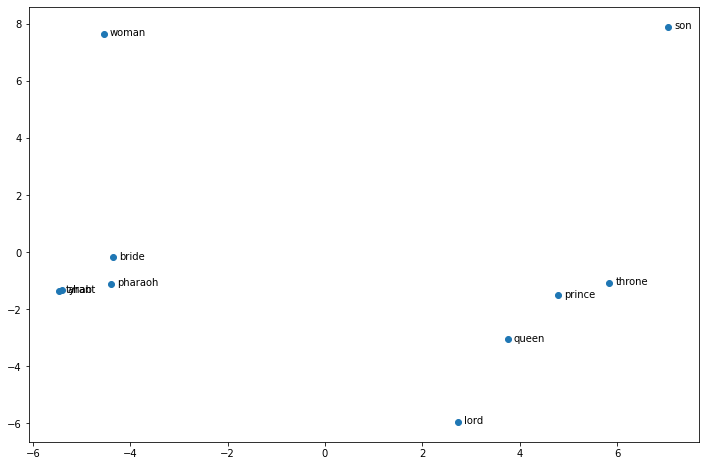

In [93]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def wv_visualizer(model,word):

    # 寻找出最相似的十个词
    words = [wp[0] for wp in  model.wv.most_similar(word,topn=10)]
    # 提取出词对应的词向量
    wordsInVector = [model.wv[word] for word in words]
    wordsInVector
    # 进行 PCA 降维
    pca = PCA(n_components=2)
    pca.fit(wordsInVector)
    X = pca.transform(wordsInVector)
    # 绘制图形
    xs = X[:, 0]
    ys = X[:, 1]
    # draw
    plt.figure(figsize=(12,8))
    plt.scatter(xs, ys, marker = 'o')
    for i, w in enumerate(words):
        plt.annotate(
            w,
            xy = (xs[i], ys[i]), xytext = (6, 6),
            textcoords = 'offset points', ha = 'left', va = 'top',
            **dict(fontsize=10)
        )

    plt.show()

# 调用时传入目标词组即可
wv_visualizer(model,["man","king"])

#### 5.2.1.7 探索实验

前面看过了TFIDF + 机器学习模型, 在这里不妨思考一下word2vec和机器学习模型的组合,这有助理解模型和数据的耦合关系

试这使用TFIDF + svm 和 word2vec + svm 完成一个文本分类任务，并成功预测新的句子。

In [480]:
"…………"

'…………'

### 5.2.2 bert 实践

Bert是NLP目前最流行的范式（预训练模型），这里不做深入的原理讨论

目前Bert的使用已经涌现出适配各框架的代码库或源码文件
- google 出版的 bert源码： 适配tensorflow1.x
- hugging face 出版的 transformers： 适配torch 和 tensorflow2.x
- 苏剑林（苏神）出版的 bert4keras：适配keras不高于2.4.2版本

本教程当前只给出基于transformer的bert快速实践方法,关于bert的内容还比较单薄，关于bert的各种实践方法和技巧还需要各位同好完善与积累。

In [1]:
# 首先，像往常一样，我们导入库，然后设置随机种子
import torch
import random
import numpy as np

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

Transformer 已经用特定的词汇进行了训练，这意味着我们需要使用完全相同的词汇进行训练，并且和 Transformer 最初训练时相同的方式标记我们的数据。transformers 库为每个提供的transformer 模型都有分词器。 在这种情况下，我们使用忽略大小写的 BERT 模型（即每个单词都会小写）。 我们通过加载预训练的“bert-base-uncased”标记器来实现这一点。

#### 5.2.2.1 tokenizer of Bert

In [2]:
from transformers import BertTokenizer
# 加载BertTokenizer
tokenizer = BertTokenizer.from_pretrained('./bert')

In [3]:
print(len(tokenizer.vocab))
# 使用tokenizer.tokenize方法对字符串进行分词，并统一大小写
tokens = tokenizer.tokenize('这世界很大?')
print(tokens)

21128
['这', '世', '界', '很', '大', '?']


In [4]:
indexes = tokenizer.convert_tokens_to_ids(tokens)
print(indexes)
init_token = tokenizer.cls_token
eos_token = tokenizer.sep_token
pad_token = tokenizer.pad_token
unk_token = tokenizer.unk_token
print(init_token, eos_token, pad_token, unk_token)
init_token_idx = tokenizer.convert_tokens_to_ids(init_token)
eos_token_idx = tokenizer.convert_tokens_to_ids(eos_token)
pad_token_idx = tokenizer.convert_tokens_to_ids(pad_token)
unk_token_idx = tokenizer.convert_tokens_to_ids(unk_token)
print(init_token_idx, eos_token_idx, pad_token_idx, unk_token_idx)
init_token_idx = tokenizer.cls_token_id
eos_token_idx = tokenizer.sep_token_id
pad_token_idx = tokenizer.pad_token_id
unk_token_idx = tokenizer.unk_token_id
print(init_token_idx, eos_token_idx, pad_token_idx, unk_token_idx)


[6821, 686, 4518, 2523, 1920, 136]
[CLS] [SEP] [PAD] [UNK]
101 102 0 100
101 102 0 100


In [5]:
max_input_length = tokenizer.max_model_input_sizes['bert-base-uncased']
print(max_input_length)

512


In [78]:
testtext = "听君一席话如听一席话"
test_tokenizer = tokenizer.encode(testtext,
                                  add_special_tokens=True,
                                  max_length=32,
                                  truncation=True,
                                  padding="max_length",
                                  return_tensors="pt")

# test_tokenizer = tokenizer.encode_plus(testtext,
#                                        add_special_tokens=True,
#                                        max_length=32,
#                                        truncation=True,
#                                        padding="max_length",
#                                        return_tensors="pt")
test_tokenizer

tensor([[ 101, 1420, 1409,  671, 2375, 6413, 1963, 1420,  671, 2375, 6413,  102,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]])

 参考资料：使用 Bert 做 特征提取
https://www.it610.com/article/1290732452595179520.htm

In [83]:
# 使用 Bert 做 特征提取
from transformers import BertTokenizer, BertModel

bert = BertModel.from_pretrained('./bert')
with torch.no_grad(): #禁用梯度计算 因为只是前向传播获取隐藏层状态，所以不需要计算梯度
    last_hidden_states = bert(test_tokenizer)[0]
last_hidden_states.shape,last_hidden_states

Some weights of the model checkpoint at ./bert were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(torch.Size([1, 32, 768]),
 tensor([[[ 0.0378,  0.6450,  0.4189,  ...,  0.2103, -0.2012, -0.3666],
          [ 0.2128, -0.3010, -0.5282,  ..., -0.1046, -0.1741, -0.1394],
          [-0.1151, -0.4983, -0.3201,  ..., -0.5699, -0.3356, -0.5096],
          ...,
          [-0.0873,  0.1830, -0.2017,  ...,  0.2609, -0.0327,  0.1089],
          [-0.1398,  0.1641, -0.3668,  ...,  0.1741, -0.0157,  0.1408],
          [-0.2374,  0.1438, -0.1978,  ...,  0.2875, -0.1162,  0.2005]]]))

In [7]:
import torch
flag = torch.cuda.is_available()
print(flag)

ngpu= 1
# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
print(device)
print(torch.cuda.get_device_name(0))
print(torch.rand(3,3).cuda()) 

True
cuda:0
GeForce RTX 3060
tensor([[0.0290, 0.4019, 0.2598],
        [0.3666, 0.0583, 0.7006],
        [0.0518, 0.4681, 0.6738]], device='cuda:0')


In [8]:
from torchtext import data

def tokenize_and_cut(sentence):
    tokens = tokenizer.tokenize(sentence) 
    tokens = tokens[:max_input_length-2]
    return tokens

TEXT = data.Field(batch_first = True,
                  use_vocab = False,
                  tokenize = tokenize_and_cut,
                  preprocessing = tokenizer.convert_tokens_to_ids,
                  tokenizer_language='cn',
                  init_token = init_token_idx,
                  eos_token = eos_token_idx,
                  pad_token = pad_token_idx,
                  unk_token = unk_token_idx)

LABEL = data.LabelField(dtype = torch.float)

#### 5.2.2.2 微博情感分析数据

In [1]:
import pandas as pd

df = pd.read_csv("./weibo_sentiment.csv")
df.head(-20)

,label,review
0,1,﻿更博了，爆照了，帅的呀，就是越来越爱你！生快傻缺[爱你][爱你][爱你]
1,1,@张晓鹏jonathan 土耳其的事要认真对待[哈哈]，否则直接开除。@丁丁看世界 很是细心...
2,1,姑娘都羡慕你呢…还有招财猫高兴……//@爱在蔓延-JC:[哈哈]小学徒一枚，等着明天见您呢/...
3,1,美~~~~~[爱你]
4,1,梦想有多大，舞台就有多大![鼓掌]
...,...,...
119963,0,今天注定应该有个不眠夜 MMP[怒]
119964,0,希望隧道今天一直堵车，直到咪咪安全走出隧道[泪][泪][泪]
119965,0,今天破了纪录了，从中午11点45到晚上9点28，泡在一家咖啡厅10个小时，午饭晚饭都在这解决...
119966,0,[泪]//@高会民:[泪]//@第一微闻: [泪]//@神笔记: [泪]//@澜澜雨露: [...


In [12]:
import random
from torchtext.data import TabularDataset 

train_x = TabularDataset(path = 'weibo_sentiment.csv',
                         format = 'csv',skip_header=True,
                         fields = [('label',LABEL),('review',TEXT)])

train_data, test_data = train_x.split(split_ratio=0.1,random_state = random.seed(42))
train_data, valid_data = train_data.split(random_state = random.seed(42))

In [13]:
print(f"Number of training examples: {len(train_data)}")
print(f"Number of validation examples: {len(valid_data)}")
print(f"Number of testing examples: {len(test_data)}")

Number of training examples: 8399
Number of validation examples: 3600
Number of testing examples: 107989


In [14]:
print(vars(train_data.examples[1]))

{'label': '1', 'review': [137, 710, 3367, 8429, 138, 7961, 2958, 140, 138, 7961, 2958, 140]}


In [15]:
LABEL.build_vocab(train_data)

In [16]:
print(LABEL.vocab.stoi)

defaultdict(None, {'0': 0, '1': 1})


In [17]:
BATCH_SIZE = 128

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE,
    sort_within_batch=True,
    sort_key = lambda x:len(x.review),
    device = device)

#### 5.2.2.3 构建模型

In [18]:
from transformers import BertTokenizer, BertModel

bert = BertModel.from_pretrained('./bert')

Some weights of the model checkpoint at ./bert were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [19]:
import torch.nn as nn

class BERTGRUSentiment(nn.Module):
    def __init__(self,
                 bert,
                 hidden_dim,
                 output_dim,
                 n_layers,
                 bidirectional,
                 dropout):
        
        super().__init__()
        
        self.bert = bert
        
        embedding_dim = bert.config.to_dict()['hidden_size']
        
        self.rnn = nn.GRU(embedding_dim,
                          hidden_dim,
                          num_layers = n_layers,
                          bidirectional = bidirectional,
                          batch_first = True,
                          dropout = 0 if n_layers < 2 else dropout)
        
        self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [batch size, sent len]
                
        with torch.no_grad():
            embedded = self.bert(text)[0]
                
        #embedded = [batch size, sent len, emb dim]
        
        _, hidden = self.rnn(embedded)
        
        #hidden = [n layers * n directions, batch size, emb dim]
        
        if self.rnn.bidirectional:
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        else:
            hidden = self.dropout(hidden[-1,:,:])
                
        #hidden = [batch size, hid dim]
        
        output = self.out(hidden)
        
        #output = [batch size, out dim]
        
        return output


In [20]:
HIDDEN_DIM = 256
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.25

model = BERTGRUSentiment(bert,
                         HIDDEN_DIM,
                         OUTPUT_DIM,
                         N_LAYERS,
                         BIDIRECTIONAL,
                         DROPOUT)
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 105,026,817 trainable parameters


In [37]:
hidden_dim = [16]
num_layers = 2
for i in range(1,num_layers):
    print(hidden_dim[i])

In [21]:
for name, param in model.named_parameters():                
    if name.startswith('bert'):
        param.requires_grad = False
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 2,759,169 trainable parameters


In [22]:
for name, param in model.named_parameters():                
    if param.requires_grad:
        print(name)

rnn.weight_ih_l0
rnn.weight_hh_l0
rnn.bias_ih_l0
rnn.bias_hh_l0
rnn.weight_ih_l0_reverse
rnn.weight_hh_l0_reverse
rnn.bias_ih_l0_reverse
rnn.bias_hh_l0_reverse
rnn.weight_ih_l1
rnn.weight_hh_l1
rnn.bias_ih_l1
rnn.bias_hh_l1
rnn.weight_ih_l1_reverse
rnn.weight_hh_l1_reverse
rnn.bias_ih_l1_reverse
rnn.bias_hh_l1_reverse
out.weight
out.bias


#### 5.2.2.4 训练模型

In [23]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()
model = model.to(device)
criterion = criterion.to(device)

def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [24]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()

        predictions = model(batch.review).squeeze(1)
        
        loss = criterion(predictions, batch.label)
        
        acc = binary_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.review).squeeze(1)
            
            loss = criterion(predictions, batch.label)
            
            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)


In [25]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


In [26]:
N_EPOCHS = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
        
    end_time = time.time()
        
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut6-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')


Epoch: 01 | Epoch Time: 0m 20s
	Train Loss: 0.315 | Train Acc: 85.55%
	 Val. Loss: 0.176 |  Val. Acc: 93.51%
Epoch: 02 | Epoch Time: 0m 19s
	Train Loss: 0.101 | Train Acc: 96.61%
	 Val. Loss: 0.087 |  Val. Acc: 97.17%
Epoch: 03 | Epoch Time: 0m 19s
	Train Loss: 0.058 | Train Acc: 97.80%
	 Val. Loss: 0.054 |  Val. Acc: 97.82%
Epoch: 04 | Epoch Time: 0m 19s
	Train Loss: 0.044 | Train Acc: 98.14%
	 Val. Loss: 0.068 |  Val. Acc: 97.33%
Epoch: 05 | Epoch Time: 0m 19s
	Train Loss: 0.044 | Train Acc: 98.07%
	 Val. Loss: 0.049 |  Val. Acc: 98.28%


#### 5.2.2.5 预测

In [59]:
def predict_sentiment(model, tokenizer, sentence):
    model.eval()
    tokens = tokenizer.tokenize(sentence)
    tokens = tokens[:max_input_length-2]
    indexed = [init_token_idx] + tokenizer.convert_tokens_to_ids(tokens) + [eos_token_idx]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(0)
    prediction = torch.sigmoid(model(tensor))
    if result < 0.5:
        print("情感极性：负面 {:.3f}".format(result))
        print("情感极性：正面 {:.3f}".format(1-result))
    else:
        print("情感极性：正面 {:.3f}".format(result))
        print("情感极性：负面 {:.3f}".format(1-result))
    return prediction.item()



In [60]:
result = predict_sentiment(model, tokenizer, "何必呀何必！何苦啊何苦！")

情感极性：负面 0.247
情感极性：正面 0.753


In [61]:
result = predict_sentiment(model, tokenizer, "美~~~")

情感极性：负面 0.247
情感极性：正面 0.753


综上所述，本教程就将NLP预处理的部分介绍完毕了，已经涵盖了大部分的NLP内容，后续我们来聊聊NLP的一些具体业务场景。
![xxxx](./NLP发展历程.png)